# Labeling Methods Walk-Thru

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import vizualization as viz

import config
import getdata as gd
from modeling_main import get_one_model, get_multiple_models

import warnings
warnings.filterwarnings('ignore')

## Comparision between various Trend Labeling methods

#### Metrics for modeling one ticker using the following trend following strategies:
1. Trend Scanning Method
2. Exponential Moving Crossover
3. Simple Moving Average Crossover 

In [2]:
methods = ['trend_labeling', 'exp_ma', 'sim_ma']

clfs = {}
model_metrics_df = pd.DataFrame()

for method in methods:
    clf, model_metrics = get_one_model('EGRX', method=method)
    clfs[method] = clf
    model_metrics_df = pd.concat([model_metrics_df, model_metrics], ignore_index=True)

In [3]:
model_metrics_tbl = model_metrics_df.drop(['symbol', 'type', 'best_model', 'performed_on', 
                                           'event_st_date', 'event_en_date', 
                                           'rawdata_st_date', 'rawdata_en_date',	
                                           'SPY_st_date', 'SPY_en_date',
                                           ]
                                           , axis=1)

Modeling Results

In [4]:
model_metrics_tbl

,f1,recall,precision,accuracy,run_time,train_test,cum_rtn,annualized_rtn,sharpe_ratio,method
0,0.251002,0.222121,0.355914,0.626259,6.640202,Train,0.000000,0.000000,0.00,trend_labeling
1,0.576254,0.816945,0.445114,0.679531,0.016484,Test,0.391783,0.184679,0.46,trend_labeling
2,0.165843,0.158742,0.287005,0.487113,5.891589,Train,0.000000,0.000000,0.00,exp_ma
3,0.055210,0.068255,0.046351,0.552452,0.024004,Test,-0.031628,-0.017485,-0.30,exp_ma
4,0.360110,0.377328,0.432643,0.615325,2.831823,Train,0.000000,0.000000,0.00,sim_ma
5,0.041933,0.051362,0.035429,0.402471,0.024332,Test,-0.056497,-0.031416,-0.38,sim_ma


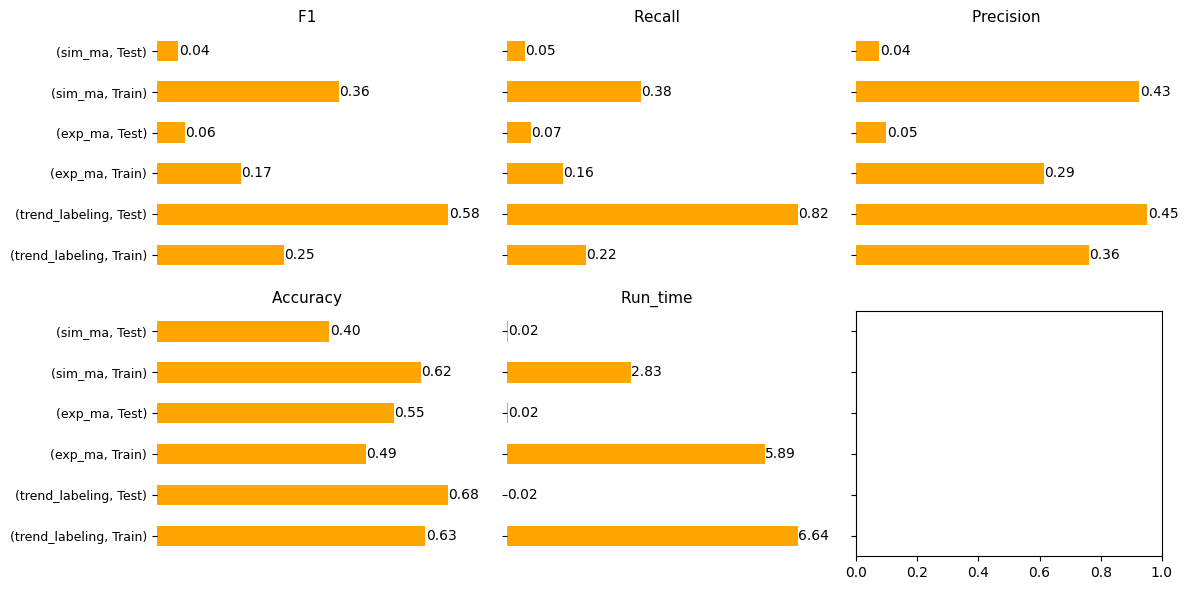

In [5]:
model_metrics_tbl_temp = model_metrics_tbl.set_index(['method', 'train_test'])

viz.plot_model_metrics_grid(model_metrics_tbl_temp[['f1','recall','precision','accuracy','run_time']])


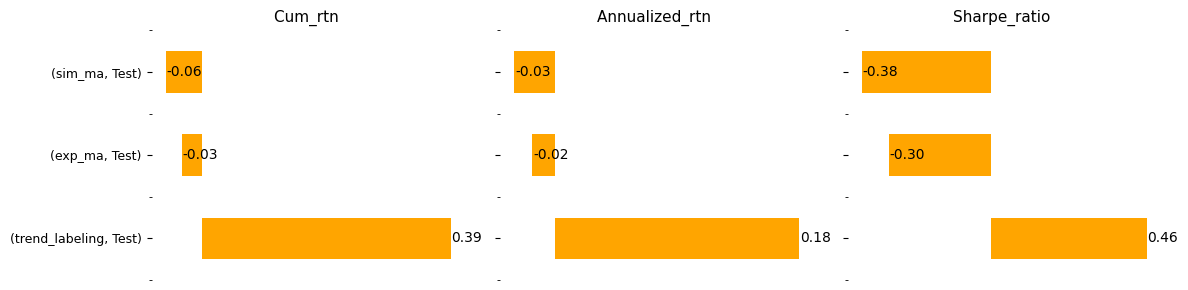

In [6]:
viz.plot_model_metrics_grid(model_metrics_tbl_temp.loc[pd.IndexSlice[:, 'Test'], ['cum_rtn','annualized_rtn','sharpe_ratio']])

#### Mean Metrics for list of tickers models using the Trend Scanning Method on various algorithms

In [8]:
pgConnStr = gd.pgDictToConn(config.pgSecrets)

lowest_price = 30
highest_price = 40

tickerlst = gd.getFilteredTickerList_Daily(lowest_price=lowest_price, highest_price=highest_price)
print('There are {} tickers between ${} and ${}.'.format(len(tickerlst), lowest_price, highest_price))
print(tickerlst)

There are 22 tickers between $30 and $40.
['AQNU', 'ATEX', 'AVID', 'AVNS', 'BROS', 'CIR', 'CPSI', 'CRTO', 'CTR', 'EGRX', 'FDP', 'FSBW', 'GLP', 'GPRE', 'KYMR', 'PARAP', 'PRCT', 'RNST', 'SCHN', 'TYG', 'VCEL', 'XPOF']


In [9]:
clfs = ['random_forest', 
        'standard_bagging_decision_tree', 
        'sequential_bootstrapping_decision_tree',
        'SVC',
        'sequential_bootstrapping_SVC'
        ]

methods = ['trend_labeling', 
           #'exp_ma', 'sim_ma'
           ]

basket_clfs = {}
basket_model_metrics_df = pd.DataFrame()


for method in methods:
    for c in clfs:
        clf, model_metrics = get_multiple_models(tickerlst, type=c, method=method)
        basket_clfs[method] = clf
        basket_model_metrics_df = pd.concat([basket_model_metrics_df, model_metrics], ignore_index=True)

Processing 1/22 AQNU...
Modeling completed 1/22 AQNU
Processing 2/22 ATEX...
Modeling completed 2/22 ATEX
Processing 3/22 AVID...
Modeling completed 3/22 AVID
Processing 4/22 AVNS...
Modeling completed 4/22 AVNS
Processing 5/22 BROS...
Modeling completed 5/22 BROS
Processing 6/22 CIR...
Modeling completed 6/22 CIR
Processing 7/22 CPSI...
Modeling completed 7/22 CPSI
Processing 8/22 CRTO...
Modeling completed 8/22 CRTO
Processing 9/22 CTR...
Modeling completed 9/22 CTR
Processing 10/22 EGRX...
Modeling completed 10/22 EGRX
Processing 11/22 FDP...
Modeling completed 11/22 FDP
Processing 12/22 FSBW...
Modeling completed 12/22 FSBW
Processing 13/22 GLP...
Modeling completed 13/22 GLP
Processing 14/22 GPRE...
Modeling completed 14/22 GPRE
Processing 15/22 KYMR...
Modeling completed 15/22 KYMR
Processing 16/22 PARAP...
Modeling completed 16/22 PARAP
Processing 17/22 PRCT...
Modeling completed 17/22 PRCT
Processing 18/22 RNST...
Modeling completed 18/22 RNST
Processing 19/22 SCHN...
Modeling 

#### Modeling Results

In [15]:
basket_model_metrics_tbl = basket_model_metrics_df.drop([ 'best_model', 'method', 'performed_on', 
                                           'event_st_date', 'event_en_date', 
                                           'rawdata_st_date', 'rawdata_en_date',	
                                           'SPY_st_date', 'SPY_en_date',
                                           ]
                                           , axis=1).dropna()

In [16]:
basket_model_metrics_tbl = basket_model_metrics_tbl.groupby([ 'type', 'train_test'])\
    .agg({'f1': 'mean', 
          'recall': 'mean', 
          'precision': 'mean', 
          'accuracy': 'mean', 
          'run_time': 'mean', 
          'cum_rtn':'mean',
          'annualized_rtn':'mean',
          'sharpe_ratio':'mean',
          'symbol': pd.Series.nunique})

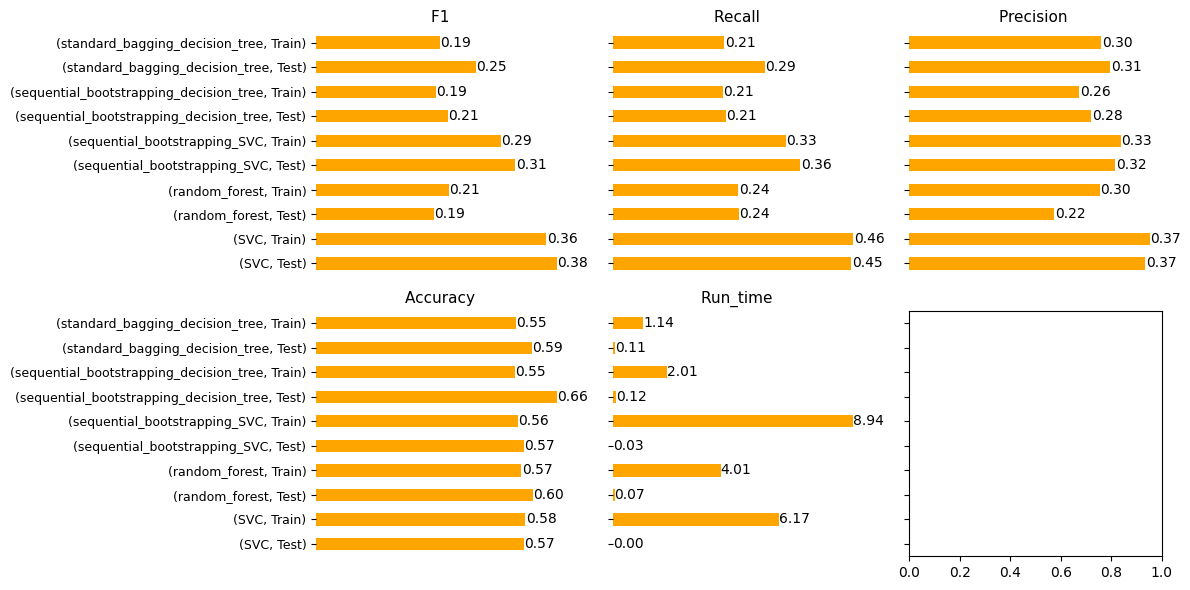

In [17]:
viz.plot_model_metrics_grid(basket_model_metrics_tbl[['f1','recall','precision','accuracy','run_time']])

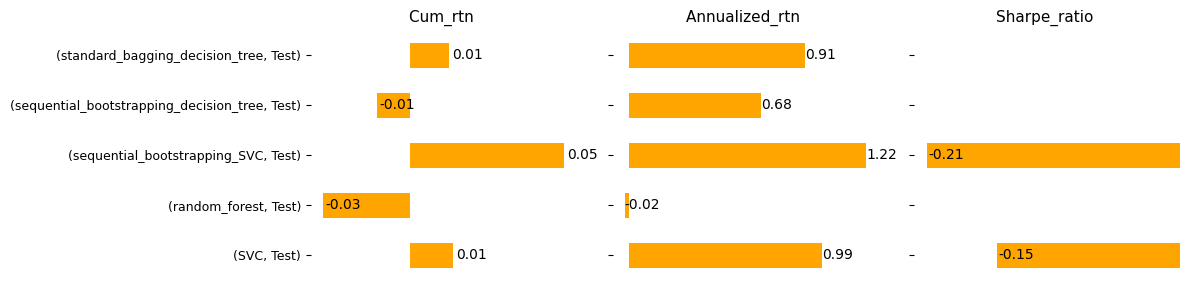

In [21]:
viz.plot_model_metrics_grid(basket_model_metrics_tbl.loc[pd.IndexSlice[:, 'Test'], ['cum_rtn','annualized_rtn','sharpe_ratio']])

In [22]:
basket_model_metrics_tbl

f1    recall  \
type                                   train_test                       
SVC                                    Test        0.379913  0.453242   
                                       Train       0.363761  0.456694   
random_forest                          Test        0.185717  0.239412   
                                       Train       0.209303  0.238791   
sequential_bootstrapping_SVC           Test        0.314046  0.355989   
                                       Train       0.291896  0.329097   
sequential_bootstrapping_decision_tree Test        0.208009  0.214694   
                                       Train       0.189179  0.209745   
standard_bagging_decision_tree         Test        0.251854  0.288671   
                                       Train       0.194974  0.211891   

                                                   precision  accuracy  \
type                                   train_test                        
SVC                                    Test         0.365631  0.572578   
                                       Train        0.372502  0.576106   
random_forest                          Test         0.224883  0.597700   
                                       Train        0.295413  0.565396   
sequential_bootstrapping_SVC           Test         0.318802  0.572145   
                                       Train        0.327651  0.556354   
sequential_bootstrapping_decision_tree Test         0.282275  0.662641   
                                       Train        0.263497  0.547917   
standard_bagging_decision_tree         Test         0.311461  0.594377   
                                       Train        0.297790  0.550458   

                                                   run_time   cum_rtn  \
type                                   train_test                       
SVC                                    Test        0.001553  0.014398   
                                       Train       6.172867  0.000000   
random_forest                          Test        0.073430 -0.028985   
                                       Train       4.013476  0.000000   
sequential_bootstrapping_SVC           Test        0.026152  0.051201   
                                       Train       8.941790  0.000000   
sequential_bootstrapping_decision_tree Test        0.120688 -0.011043   
                                       Train       2.014265  0.000000   
standard_bagging_decision_tree         Test        0.108233  0.012874   
                                       Train       1.139081  0.000000   

                                                   annualized_rtn  \
type                                   train_test                   
SVC                                    Test              0.992134   
                                       Train             0.000000   
random_forest                          Test             -0.021319   
                                       Train             0.000000   
sequential_bootstrapping_SVC           Test              1.218881   
                                       Train             0.000000   
sequential_bootstrapping_decision_tree Test              0.678951   
                                       Train             0.000000   
standard_bagging_decision_tree         Test              0.905611   
                                       Train             0.000000   

                                                   sharpe_ratio  symbol  
type                                   train_test                        
SVC                                    Test           -0.151429      21  
                                       Train           0.000000      21  
random_forest                          Test                 NaN      22  
                                       Train           0.000000      22  
sequential_bootstrapping_SVC           Test           -0.209500      20  
                                       Train           0.000000    

#### Cumulative Retruns of Individual Stocks from the SVC and Sequential Bootstrapped SVC models

In [44]:
import pandas as pd
results = pd.read_csv('20230413_labeling_origdf.csv')

In [49]:
trades = results[(results.type.isin(['SVC','sequential_bootstrapping_SVC'])) & (results.train_test == 'Test')]
trades = trades[['type', 'symbol', 'cum_rtn']]#

In [50]:
trades = trades.set_index(['type', 'symbol'])

In [72]:
trades.groupby('type').mean()

,cum_rtn
type,
SVC,0.014398
sequential_bootstrapping_SVC,0.051201


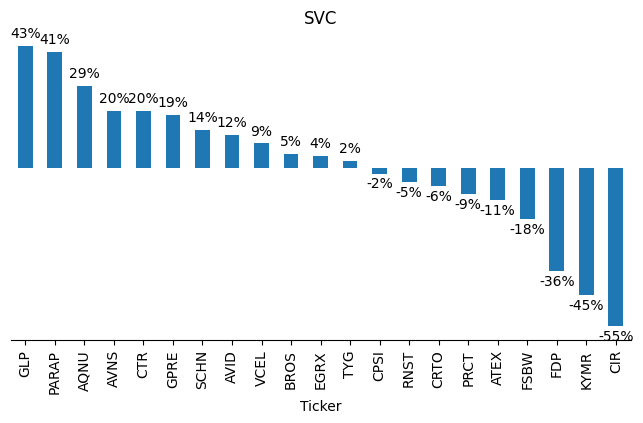

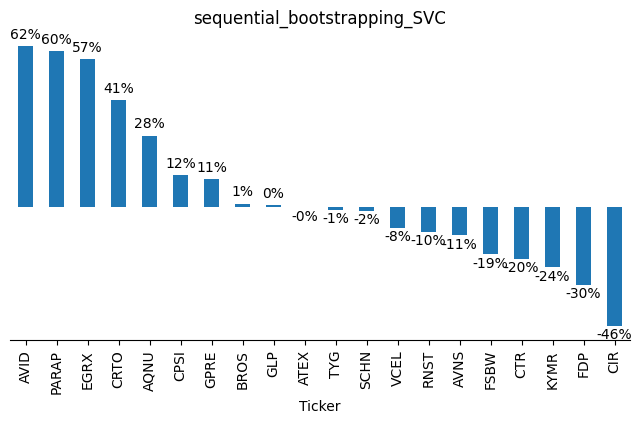

In [71]:
groups = trades.groupby(level=0)

# Create a separate bar chart for each group
for name, group in groups:
    group = group.sort_values(by='cum_rtn', ascending=False)
    fig, ax = plt.subplots(figsize=(8, 4))
    group.plot(kind='bar', y='cum_rtn', ax=ax, legend=False)
    tick_labels = list(group.index.get_level_values(1))
    ax.set_xticklabels(tick_labels)
    for i, v in enumerate(group['cum_rtn']):
        ax.text(i, v+0.03 if v >0 else v-0.05, f"{v*100:.0f}%", ha='center')
    ax.set_title(name)
    ax.set_xlabel('Ticker')
    ax.set_ylabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.set_yticks([])
    plt.show()